##import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

##import dataset

In [ ]:
df = pd.read_csv("forest_cover.csv")
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


##drop Id column

In [ ]:
df = df.iloc[:,1:]
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


##shape of dataset

In [ ]:
df.shape

(15120, 55)

##data type of each feature

In [ ]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

##information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

##Data Exploration
Part 1. Describe numerical features 

Part 2. Describe binary/categorical features

##extract all numerical features from dataset

In [ ]:
num_features = df.iloc[:,:10]
num_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


##shape of numerical features

In [ ]:
num_features.shape

(15120, 10)

In [ ]:
num_features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


##extract all categorical features from dataset

In [ ]:
cat_features = df.iloc[:, 10:-1]
cat_features.head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


##shape of categorical data

In [ ]:
cat_features.shape

(15120, 44)

In [ ]:
cat_features.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##feature skew
For normal distribution, the skewness should be zero. Thus any balanced data should have a skewness near zero.
Negative values indicate data is skewed left. The left tail is long relative to the right tail.
Positive values indicate data is skewed right. The right tail is long relative the left tail.

In [ ]:
skew = df.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])

In [ ]:
print(skew)

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

##Feature Visualization

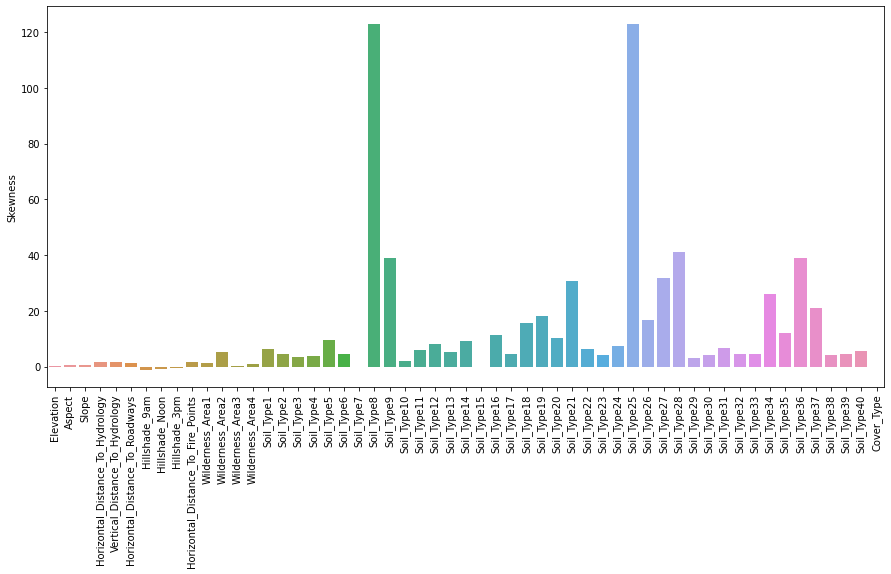

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

##class distribution

In [ ]:
df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

##dependent variable visualization

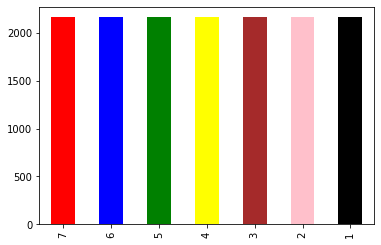

In [ ]:
df['Cover_Type'].value_counts().plot(kind="bar",color=["red","blue","green","yellow","brown","pink","black"])

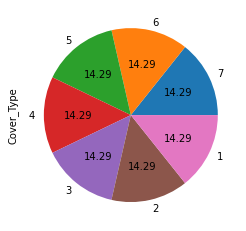

In [ ]:
df['Cover_Type'].value_counts().plot(kind="pie", autopct="%.2f")

##observation of wildness areas

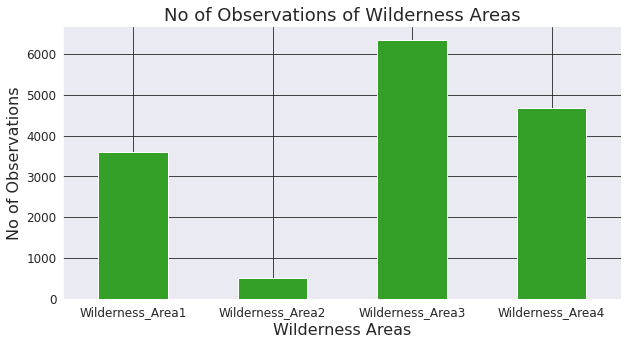

In [ ]:
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]


sns.set_style("darkgrid", {'grid.color':'.1'})
#flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

#palette = sns.color_palette(flatui)

wild_data.sum().plot(kind='bar', figsize=(10,5), color='#34a028')
plt.title('No of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas', size=16)
plt.ylabel('No of Observations', size=16)
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

In [ ]:
wild_data.sum()

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

##observations of soil types

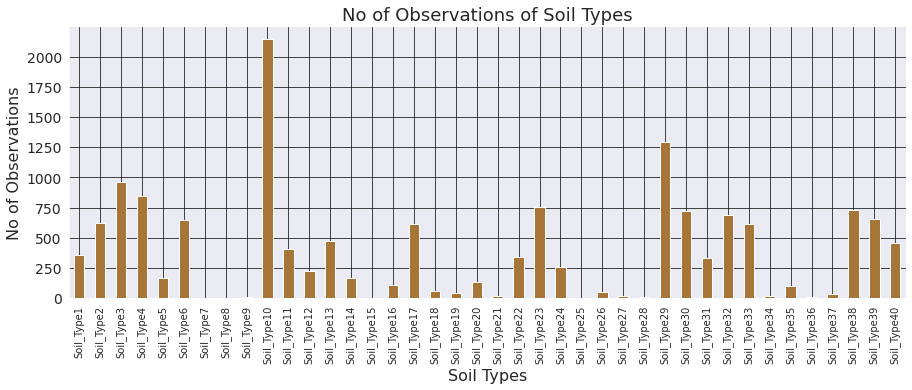

In [ ]:
sns.set_style("darkgrid", {'grid.color': '.1'})

soil_data.sum().plot(kind='bar', figsize=(15,5), color='#a87539')
plt.title('No of Observations of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('No of Observations', size=16)
plt.xticks(rotation=90, size=10)
plt.yticks(size=14)

sns.despine()
plt.show()

In [ ]:
soil_data.sum()

Soil_Type1      355
Soil_Type2      623
Soil_Type3      962
Soil_Type4      843
Soil_Type5      165
Soil_Type6      650
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    2142
Soil_Type11     406
Soil_Type12     227
Soil_Type13     476
Soil_Type14     169
Soil_Type15       0
Soil_Type16     114
Soil_Type17     612
Soil_Type18      60
Soil_Type19      46
Soil_Type20     139
Soil_Type21      16
Soil_Type22     345
Soil_Type23     757
Soil_Type24     257
Soil_Type25       1
Soil_Type26      54
Soil_Type27      15
Soil_Type28       9
Soil_Type29    1291
Soil_Type30     725
Soil_Type31     332
Soil_Type32     690
Soil_Type33     616
Soil_Type34      22
Soil_Type35     102
Soil_Type36      10
Soil_Type37      34
Soil_Type38     728
Soil_Type39     657
Soil_Type40     459
dtype: int64

##numnerical features Inferences

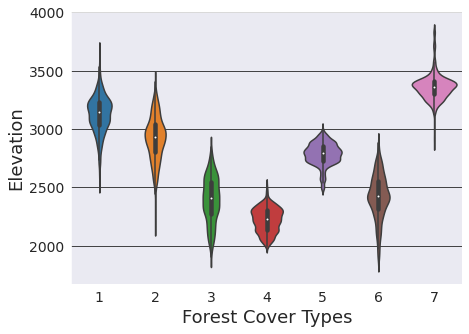

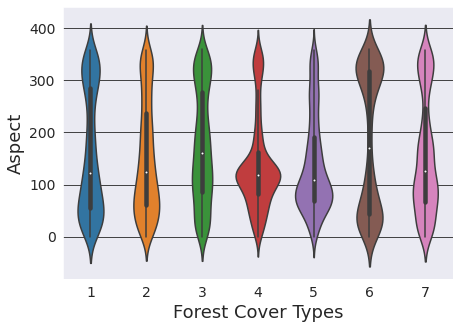

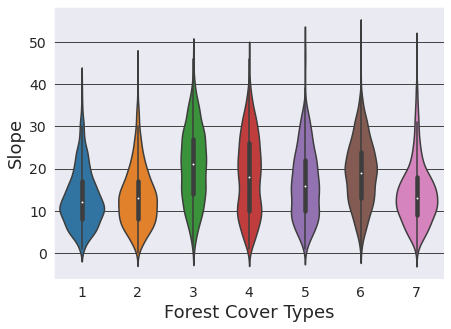

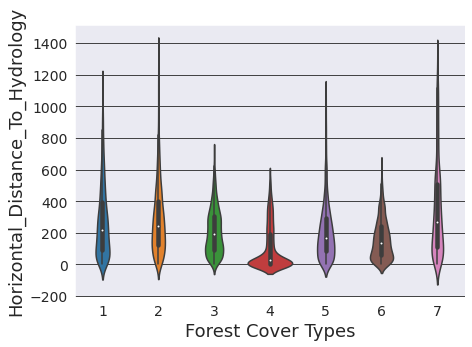

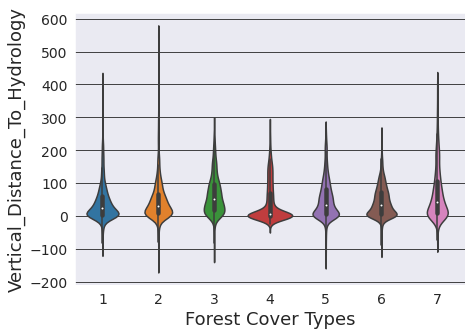

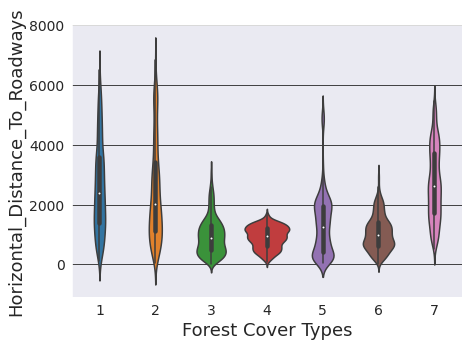

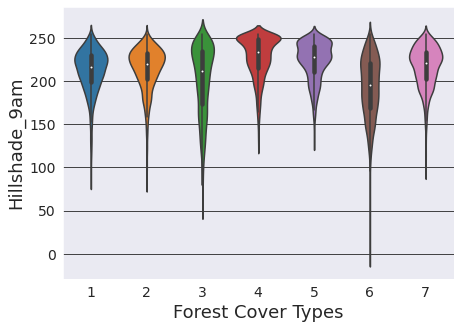

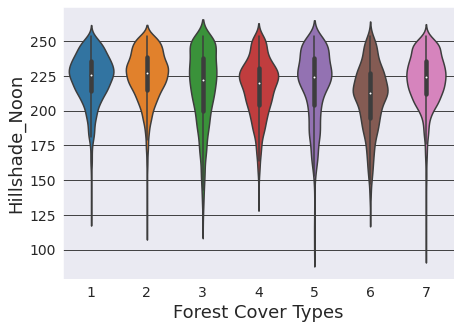

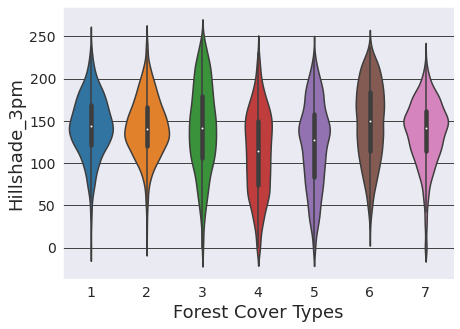

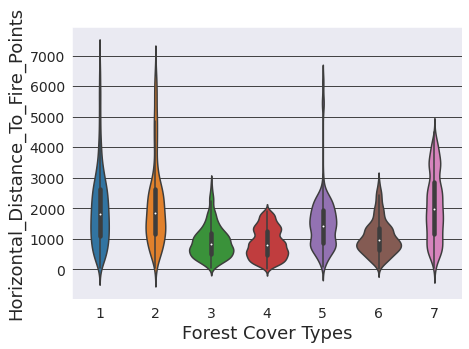

In [ ]:
sns.set_style("darkgrid", {'grid.color': '.1'})

target = df['Cover_Type']

features = num_features.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(7,5))
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(features[i], size=18)
    
    plt.show()

## wilderness area inferences

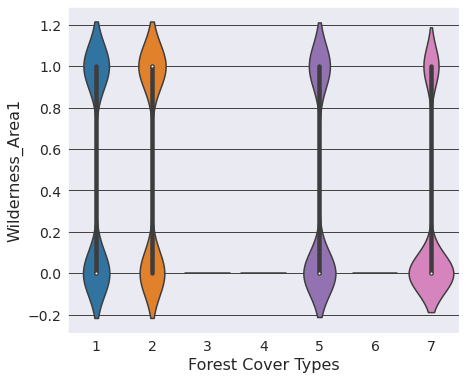

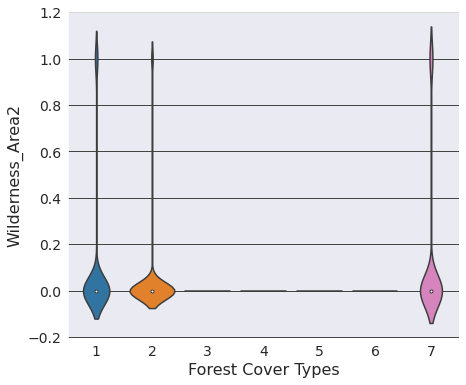

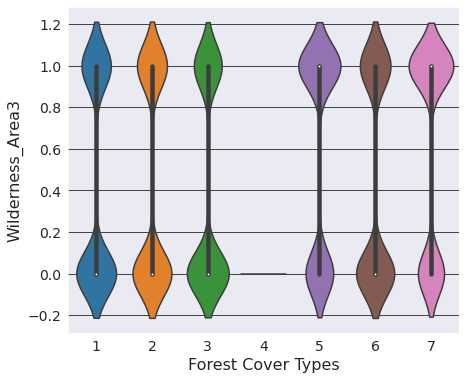

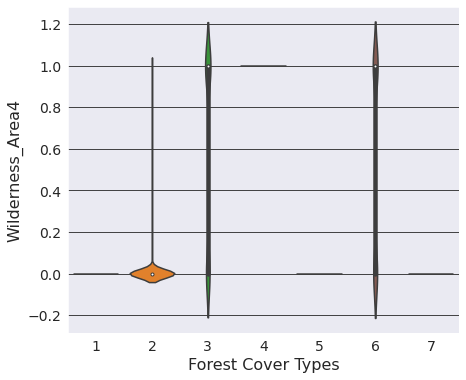

In [ ]:
sns.set_style("darkgrid", {'grid.color': '.1'})

target = df['Cover_Type']

features = wild_data.columns

for i in range(0, len(features)):
    
    plt.subplots(figsize=(7,6))
    sns.violinplot(data=wild_data, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=16)
    plt.ylabel(features[i], size=16)
    
    plt.show()

##soil type inferences

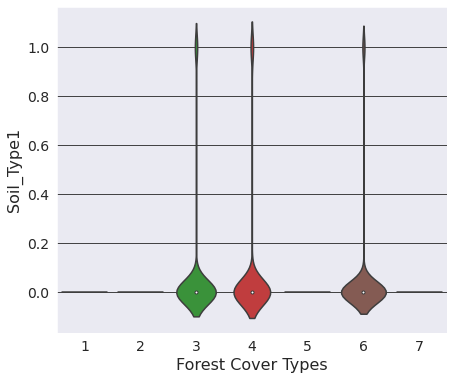

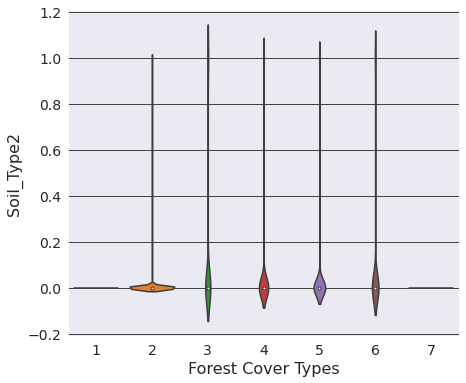

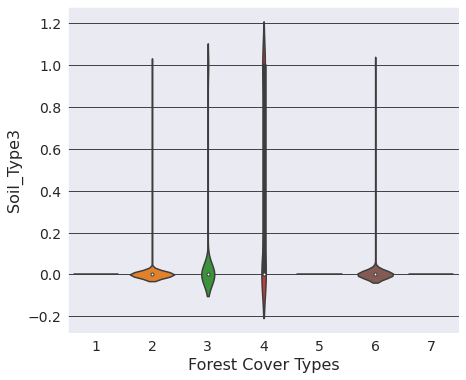

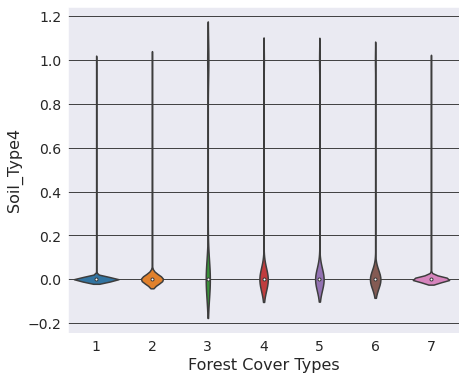

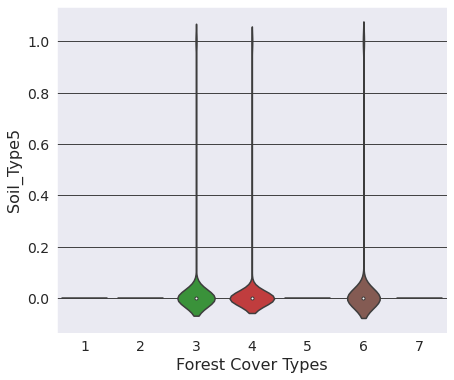

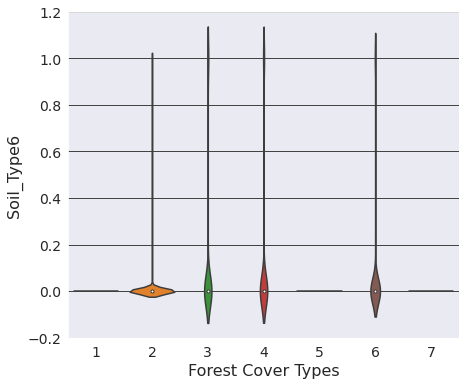

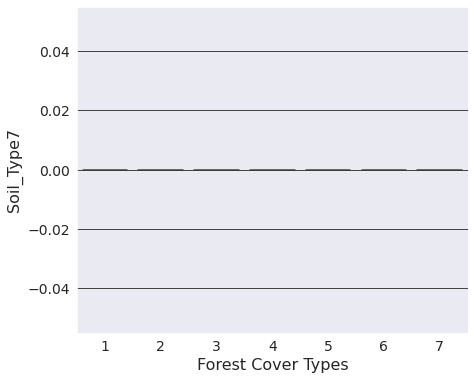

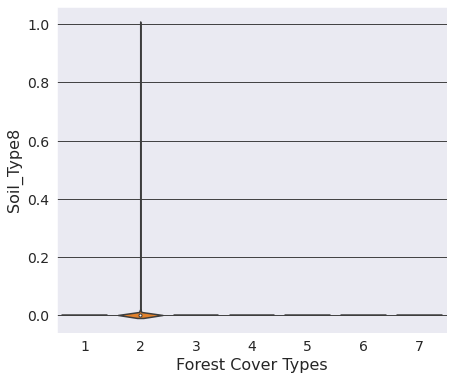

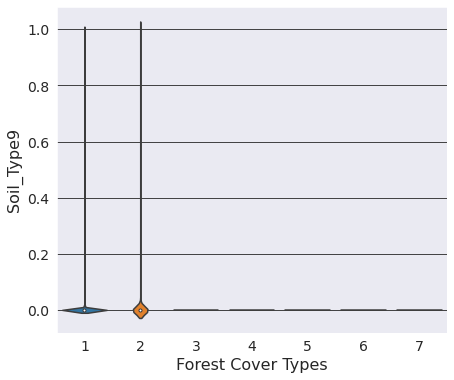

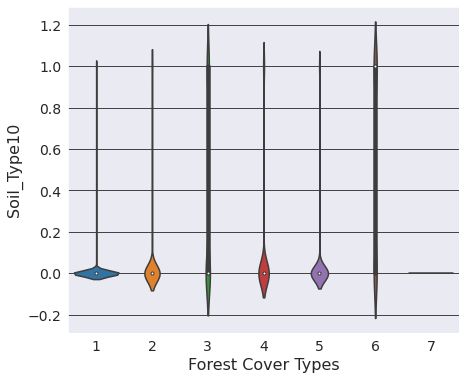

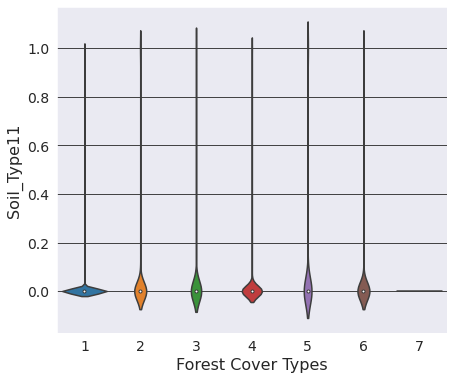

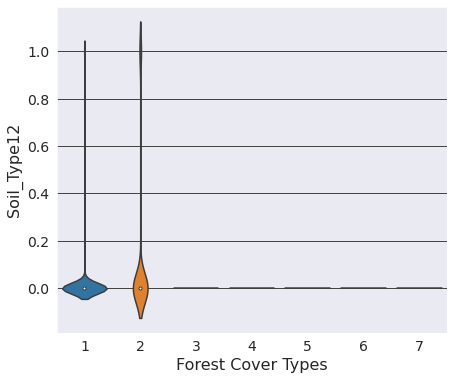

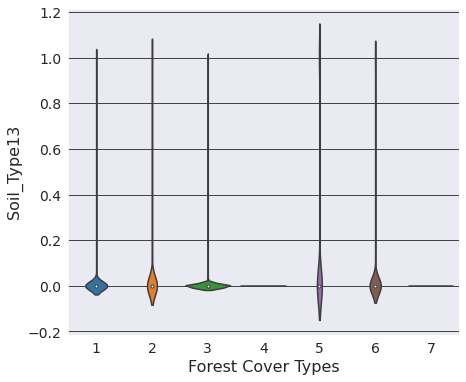

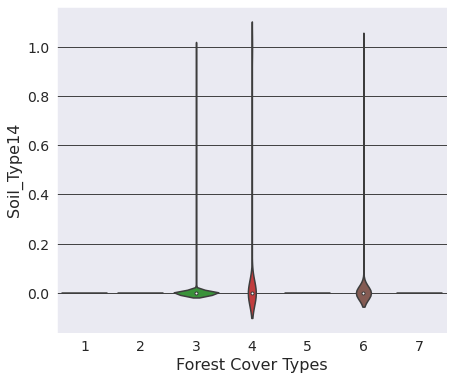

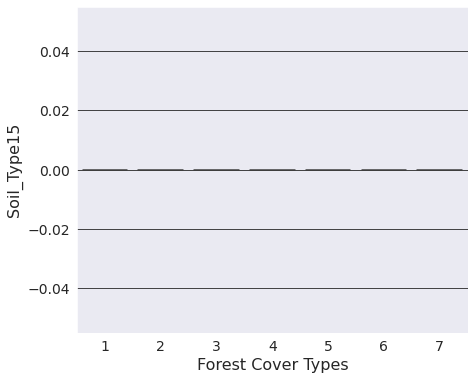

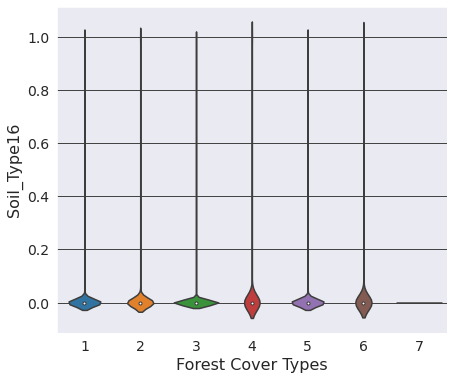

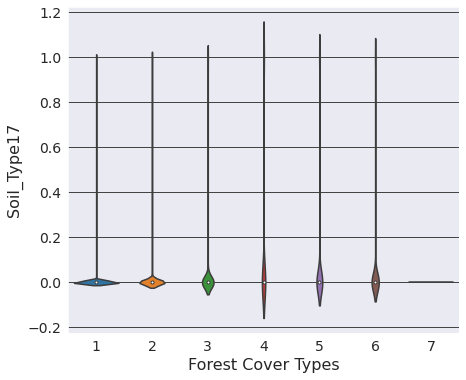

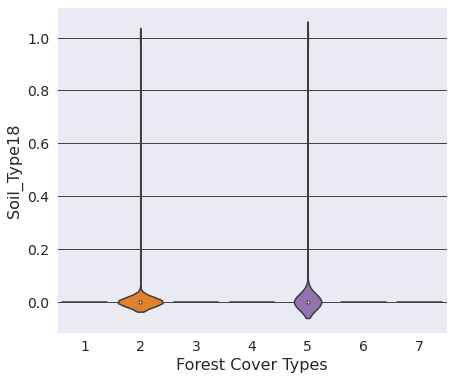

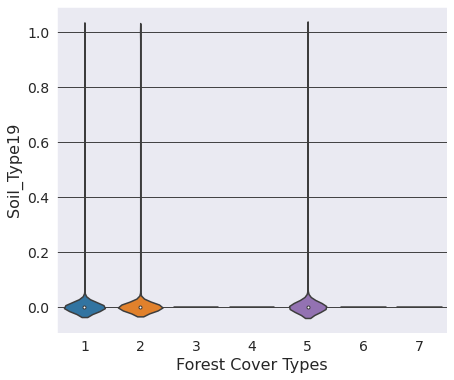

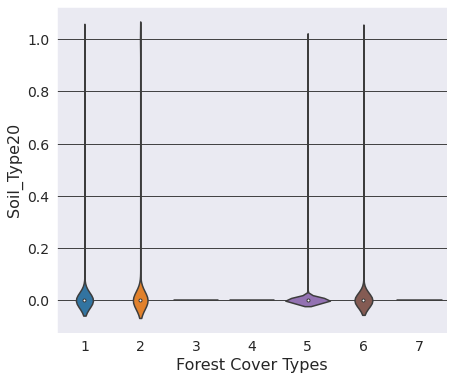

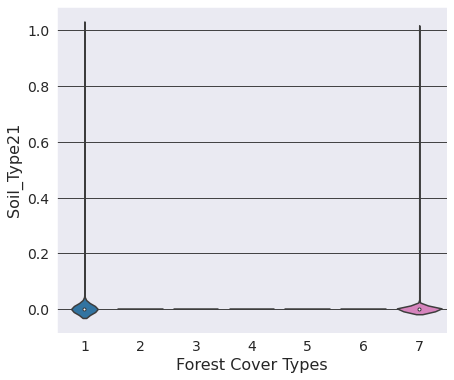

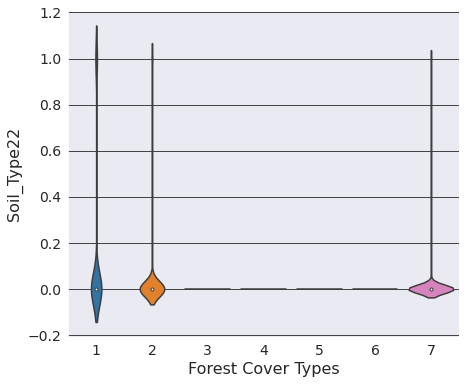

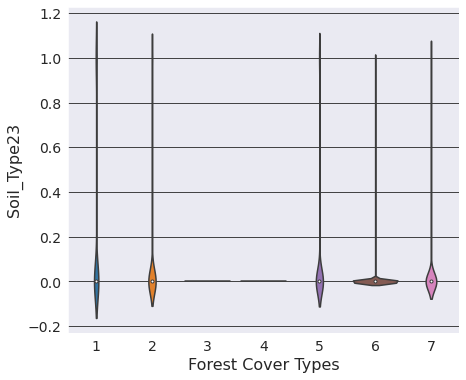

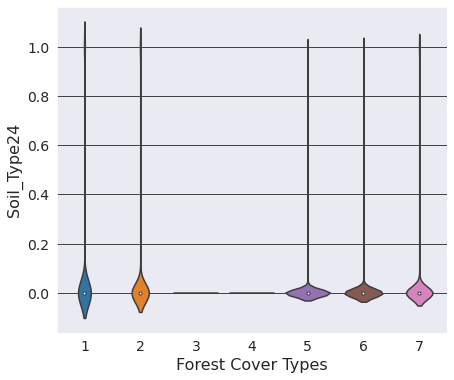

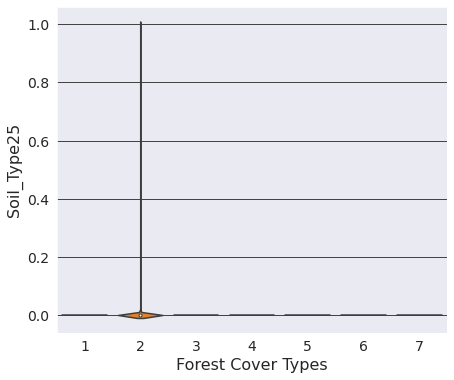

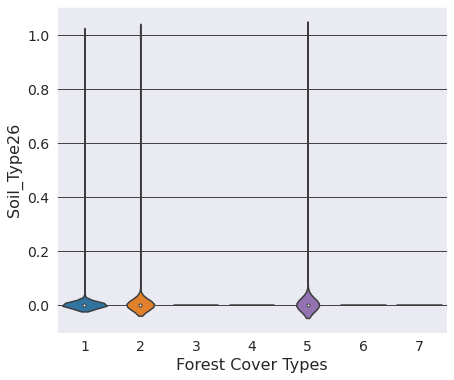

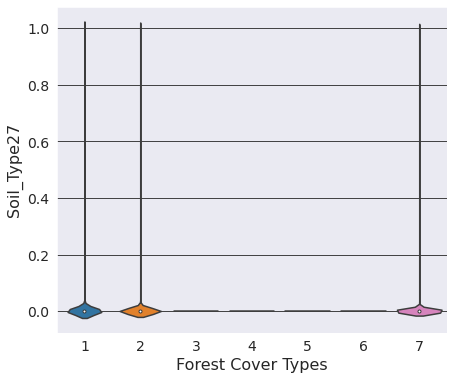

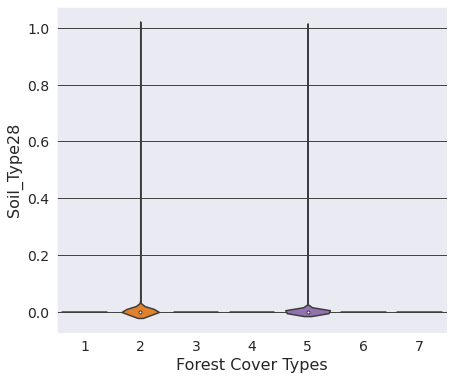

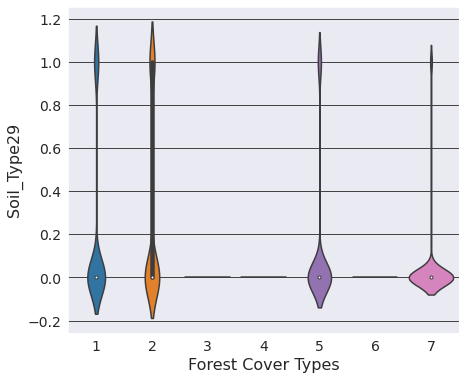

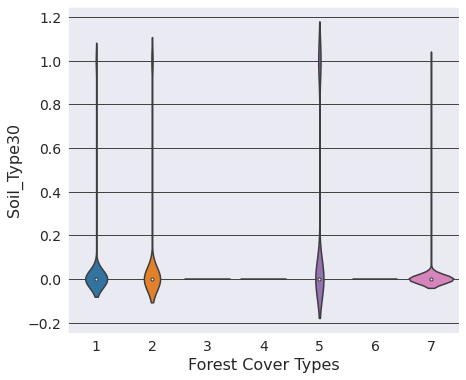

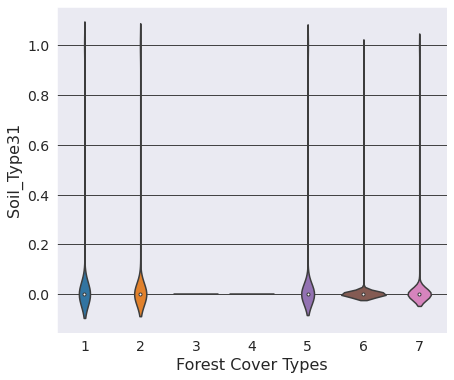

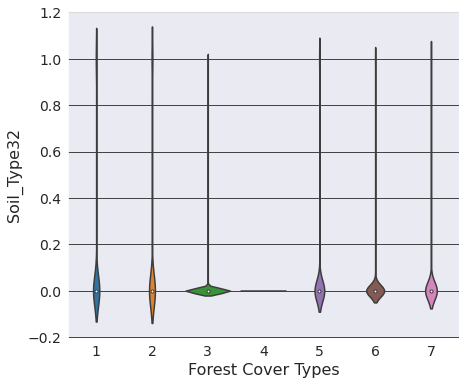

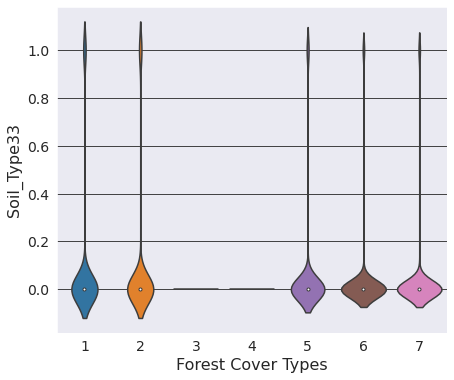

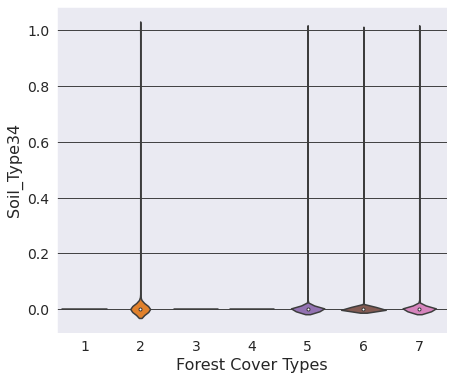

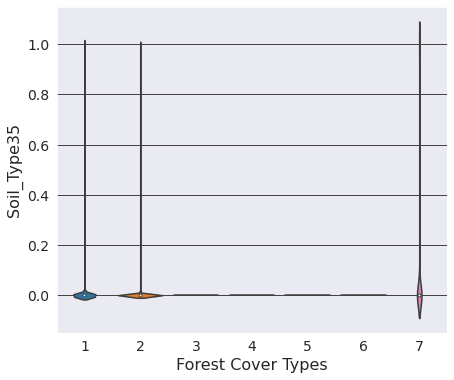

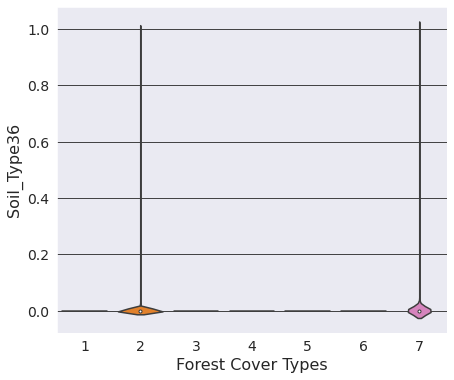

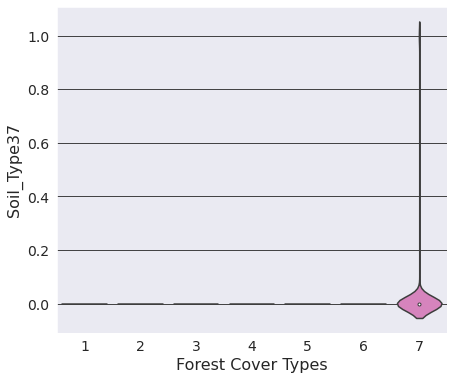

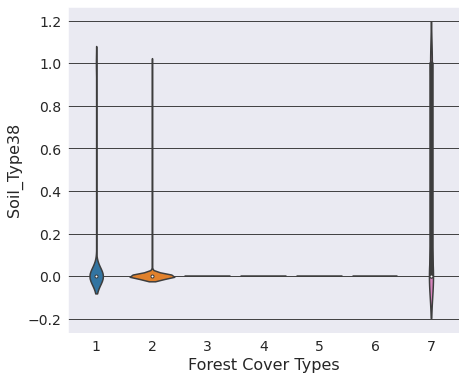

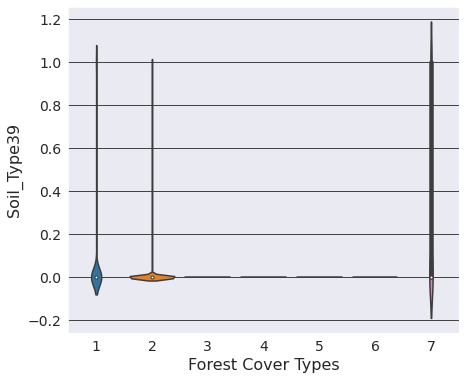

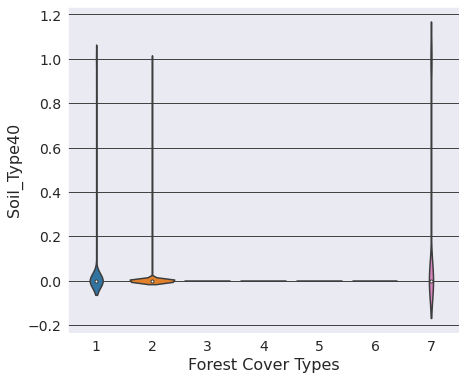

In [ ]:
sns.set_style("darkgrid", {'grid.color':'.1'})

target = df['Cover_Type']

features = soil_data.columns

for i in range(0, len(features)):
    plt.subplots(figsize=(7,6))
    sns.violinplot(data=soil_data, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=16)
    plt.ylabel(features[i], size=16)
    
    plt.show()

#**Feature Engineering**

##check for wilderness area

In [ ]:
more_count = 0
# count for no presence
none_count = 0
# total count
total = 0

# loop through each row of wilderness area column
for index, row in wild_data.iterrows():
    # add the values of each col of that row
    total = row.sum(axis=0)
    
    # check for greater than 1
    if total > 1:
        more_count += 1
        total = 0
        break
        
    # check for none    
    if total == 0:
        none_count += 1
        total = 0
        
print(f'We have {more_count} observations that shows presence in more than 1 Wilderness Area.')
print(f'We have {none_count} observations that shows no presence in any Wilderness Area.')

We have 0 observations that shows presence in more than 1 Wilderness Area.
We have 0 observations that shows no presence in any Wilderness Area.


##check for soil type 

In [ ]:
more_count = 0
# count for no presence
none_count = 0
# total count
total = 0

# loop through each row of soil type column
for index, row in soil_data.iterrows():
    # add the values of each col of that row
    total = row.sum(axis=0)
    
    # check for greater than 1
    if total > 1:
        more_count += 1
        total = 0
        break
        
    # check for none
    if total == 0:
        none_count += 1
        total = 0

print(f'We have {more_count} observations that shows presence in more than 1 Soil Type Area.')
print(f'We have {none_count} observations that shows no presence in any Soil Type Area.')

We have 0 observations that shows presence in more than 1 Soil Type Area.
We have 0 observations that shows no presence in any Soil Type Area.


##handling missong values

In [ ]:
df.dropna()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.shape

(15120, 55)

##handling duplicates value

In [ ]:
df.drop_duplicates(keep = 'first')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.shape

(15120, 55)

#**Data preprocessing**

##dependent and independent variable

In [ ]:
x_num = df.iloc[:, 0:10].values
x_cat = df.iloc[:, 10:54].values
y = df.iloc[:,-1].values

##standardize numerical columns

In [ ]:
scaler = StandardScaler()
scaler.fit(x_num)
x_num = scaler.fit_transform(x_num)
x_num

array([[-3.67095118e-01, -9.59979824e-01, -1.59713163e+00, ...,
         5.71653464e-01,  2.81258883e-01,  4.33480516e+00],
       [-3.81460719e-01, -9.14559204e-01, -1.71542377e+00, ...,
         7.03225420e-01,  3.46627374e-01,  4.28570980e+00],
       [ 1.30912403e-01, -1.60576912e-01, -8.87378800e-01, ...,
         8.34797376e-01, -2.00457607e-03,  4.19115576e+00],
       ...,
       [-6.16098878e-01, -2.05997532e-01,  1.00529541e+00, ...,
         4.53656392e-02, -1.13505841e+00, -2.94706113e-01],
       [-6.28070213e-01,  9.37785603e-02,  1.36017182e+00, ...,
         7.90940058e-01, -3.50636526e-01, -5.26545346e-01],
       [-6.56801416e-01,  3.66302280e-01,  2.06992465e+00, ...,
         1.09794129e+00,  6.29890833e-01, -5.42910468e-01]])

##shape of dependent and independent variables

In [ ]:
print(f'Categorical Shape: {x_cat.shape}')
print(f'Numerical Shape: {x_num.shape}')
print(f'Label Shape: {y.shape}')

Categorical Shape: (15120, 44)
Numerical Shape: (15120, 10)
Label Shape: (15120,)


##combine num_data and cat_data

In [ ]:
x = np.hstack((x_num, x_cat))
print(x.shape)

(15120, 54)


In [ ]:
x = df.iloc[:,:-1] 
y = df['Cover_Type']

##extra tree classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state = 53) # pass the model
x = df.iloc[:,:-1] # feed features to var X
y = df['Cover_Type'] # feed target variable to y

etc_model.fit(x,y) # train the ETC model

# extract feature importances
etc_feature_importances = pd.DataFrame(etc_model.feature_importances_, index=x.columns,
                                      columns=['ETC']).sort_values('ETC', ascending=False)

etc_model = None # remove trace of this ETC model
etc_feature_importances.head(10)

,ETC
Elevation,0.159928
Horizontal_Distance_To_Roadways,0.077018
Horizontal_Distance_To_Fire_Points,0.065816
Wilderness_Area4,0.061310
Horizontal_Distance_To_Hydrology,0.057993
Vertical_Distance_To_Hydrology,0.050234
Aspect,0.049549
Hillshade_9am,0.049126
Hillshade_3pm,0.045640
Hillshade_Noon,0.044622


##random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(random_state = 53) # pass the model
rfc_model.fit(x,y) # train the model

# extract feature importances
rfc_feature_importances = pd.DataFrame(rfc_model.feature_importances_, index=x.columns, 
                                       columns=['RFC']).sort_values('RFC', ascending=False)

rfc_model = None # remove trace of this RFC model
rfc_feature_importances.head(10)

,RFC
Elevation,0.216827
Horizontal_Distance_To_Roadways,0.092328
Horizontal_Distance_To_Fire_Points,0.072607
Horizontal_Distance_To_Hydrology,0.061735
Vertical_Distance_To_Hydrology,0.056420
Wilderness_Area4,0.053491
Aspect,0.050662
Hillshade_9am,0.049689
Hillshade_3pm,0.046635
Hillshade_Noon,0.044649


##AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(random_state = 53) # pass the model
adb_model.fit(x,y) # train the model

# extract feature importances
adb_feature_importances = pd.DataFrame(adb_model.feature_importances_, index=x.columns,
                                      columns=['ADB']).sort_values('ADB', ascending=False)

adb_model = None # remove trace of this ADB model
adb_feature_importances.head(10)

,ADB
Elevation,0.42
Wilderness_Area4,0.42
Horizontal_Distance_To_Hydrology,0.12
Vertical_Distance_To_Hydrology,0.04
Soil_Type28,0.00
Soil_Type18,0.00
Soil_Type19,0.00
Soil_Type20,0.00
Soil_Type21,0.00
Soil_Type22,0.00


##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state = 53) # pass the model
gbc_model.fit(x,y) # train the model

# extract feature importances
gbc_feature_importances = pd.DataFrame(gbc_model.feature_importances_, index=x.columns,
                                      columns=['GBC']).sort_values('GBC', ascending=False)

gbc_model = None # remove trace of GBC model
gbc_feature_importances.head(10)

,GBC
Elevation,0.589901
Soil_Type10,0.051200
Horizontal_Distance_To_Roadways,0.049589
Horizontal_Distance_To_Hydrology,0.042876
Horizontal_Distance_To_Fire_Points,0.039865
Hillshade_9am,0.037807
Soil_Type3,0.016954
Soil_Type30,0.016446
Vertical_Distance_To_Hydrology,0.015139
Soil_Type4,0.014361


In [ ]:
sample = train[[
    'Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Wilderness_Area4',
    'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Hillshade_3pm','Hillshade_Noon',
    'Hillshade_9am','Cover_Type'
]]

##feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# pass range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# X = sample.iloc[:,:-1] # feed sample features to X
# y = sample['Cover_Type'] # feed target variable to y

x_scaled = scaler.fit_transform(x) # apply feature scaling to all features

In [ ]:
x_scaled

array([[0.36908359, 0.14166667, 0.05769231, ..., 0.        , 0.        ,
        0.        ],
       [0.36606244, 0.15555556, 0.03846154, ..., 0.        , 0.        ,
        0.        ],
       [0.47381672, 0.38611111, 0.17307692, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31671702, 0.37222222, 0.48076923, ..., 0.        , 0.        ,
        0.        ],
       [0.3141994 , 0.46388889, 0.53846154, ..., 0.        , 0.        ,
        0.        ],
       [0.3081571 , 0.54722222, 0.65384615, ..., 0.        , 0.        ,
        0.        ]])

##Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=53)

In [ ]:
print(x_train.shape, x_test.shape)

(12096, 54) (3024, 54)


##Model evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
import time

# function
def model_evaluation(clf):
    clf = clf # pass classifier to variable
    
    t_start = time.time() # record time
    clf = clf.fit(x_scaled, y) # classifier learning model
    t_end = time.time() # record time
    
    c_start = time.time() # record time
    accuracy = cross_val_score(clf, x_scaled, y, cv=10, scoring='accuracy')
    f1_score = cross_val_score(clf, x_scaled, y, cv=10, scoring='f1_macro')
    c_end = time.time() # record time
    
    # calculate mean of all 10 obs' accuracy and f1 as percent
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    t_time = np.round((t_end - t_start) / 60, 3) # time for training
    c_time = np.round((c_end - c_start) / 60, 3) # time for evaluating scores
    clf = None # remove traces of classifier
    
    print(f'The accuracy score of this classifier is: {acc_mean}%.')
    print(f'The f1 score of this classifier is: {f1_mean}%.')
    print(f'This classifier took {t_time} minutes to train and {c_time} minutes to evaluate CV and metric scores.')

##MultinomialNB Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_evaluation(MultinomialNB())

The accuracy score of this classifier is: 57.04%.
The f1 score of this classifier is: 55.23%.
This classifier took 0.0 minutes to train and 0.006 minutes to evaluate CV and metric scores.


##KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_evaluation(KNeighborsClassifier(n_jobs=-1))

The accuracy score of this classifier is: 69.95%.
The f1 score of this classifier is: 69.41%.
This classifier took 0.0 minutes to train and 0.276 minutes to evaluate CV and metric scores.


##RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_evaluation(RandomForestClassifier(n_jobs=-1, random_state=53))

The accuracy score of this classifier is: 78.11%.
The f1 score of this classifier is: 77.75%.
This classifier took 0.033 minutes to train and 0.748 minutes to evaluate CV and metric scores.


##Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model_evaluation(SGDClassifier(n_jobs=-1, random_state=53))

The accuracy score of this classifier is: 61.27%.
The f1 score of this classifier is: 58.86%.
This classifier took 0.01 minutes to train and 0.179 minutes to evaluate CV and metric scores.


##Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_evaluation(ExtraTreesClassifier(n_jobs=-1, random_state=53))

The accuracy score of this classifier is: 78.11%.
The f1 score of this classifier is: 77.84%.
This classifier took 0.024 minutes to train and 0.671 minutes to evaluate CV and metric scores.


##Logistic classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
model_evaluation(LogisticRegression(n_jobs=-1, random_state=53, solver='saga', max_iter = 500))

The accuracy score of this classifier is: 64.11%.
The f1 score of this classifier is: 63.35%.
This classifier took 0.052 minutes to train and 0.956 minutes to evaluate CV and metric scores.


##Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in the forest algorithm
n_estimators = [50, 100, 300, 500, 1000]

# minimum number of samples required to split an internal node
min_samples_split = [2, 3, 5, 7, 9]

# minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# number of features to consider when looking for the best split
max_features = ['auto','sqrt','log2',None]

# define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

# create model
best_model = ExtraTreesClassifier(random_state=42)
# create randomized search object
random_cv = RandomizedSearchCV(estimator=best_model, param_distributions=hyperparameter_grid, cv=10,
                               n_iter=20, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True, random_state=0)

# fit on all training data using random search object
random_cv.fit(x_scaled, y)
random_cv.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


ExtraTreesClassifier(max_features=None, min_samples_split=7, n_estimators=50,
                     random_state=42)

##Train Final Model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

clf = ExtraTreesClassifier(n_estimators=50, random_state=42, min_samples_split=7, max_features=None) # best classifier
clf = clf.fit(x, y) # train model
predict = clf.predict(x) # predict unseen data
accuracy = accuracy_score(y, predict) # calculate accuracy
f1_score = f1_score(y, predict, average='macro') # calculate f1 score

accuracy = np.round(accuracy * 100)
f1_score = np.round(f1_score * 100)

clf = None # clean traces

print(f'The accuracy score of our final model ETC on our testing set is {accuracy}%.')
print(f'The f1 score of our final model ETC on our testing set is {f1_score}%.')

The accuracy score of our final model ETC on our testing set is 100.0%.
The f1 score of our final model ETC on our testing set is 100.0%.
